### Robot Learning

### Assignment 2

Solutions are due on 29.04.2025 before the lecture.

### Introduction

Consider the following $9 \times 9$ grid world:

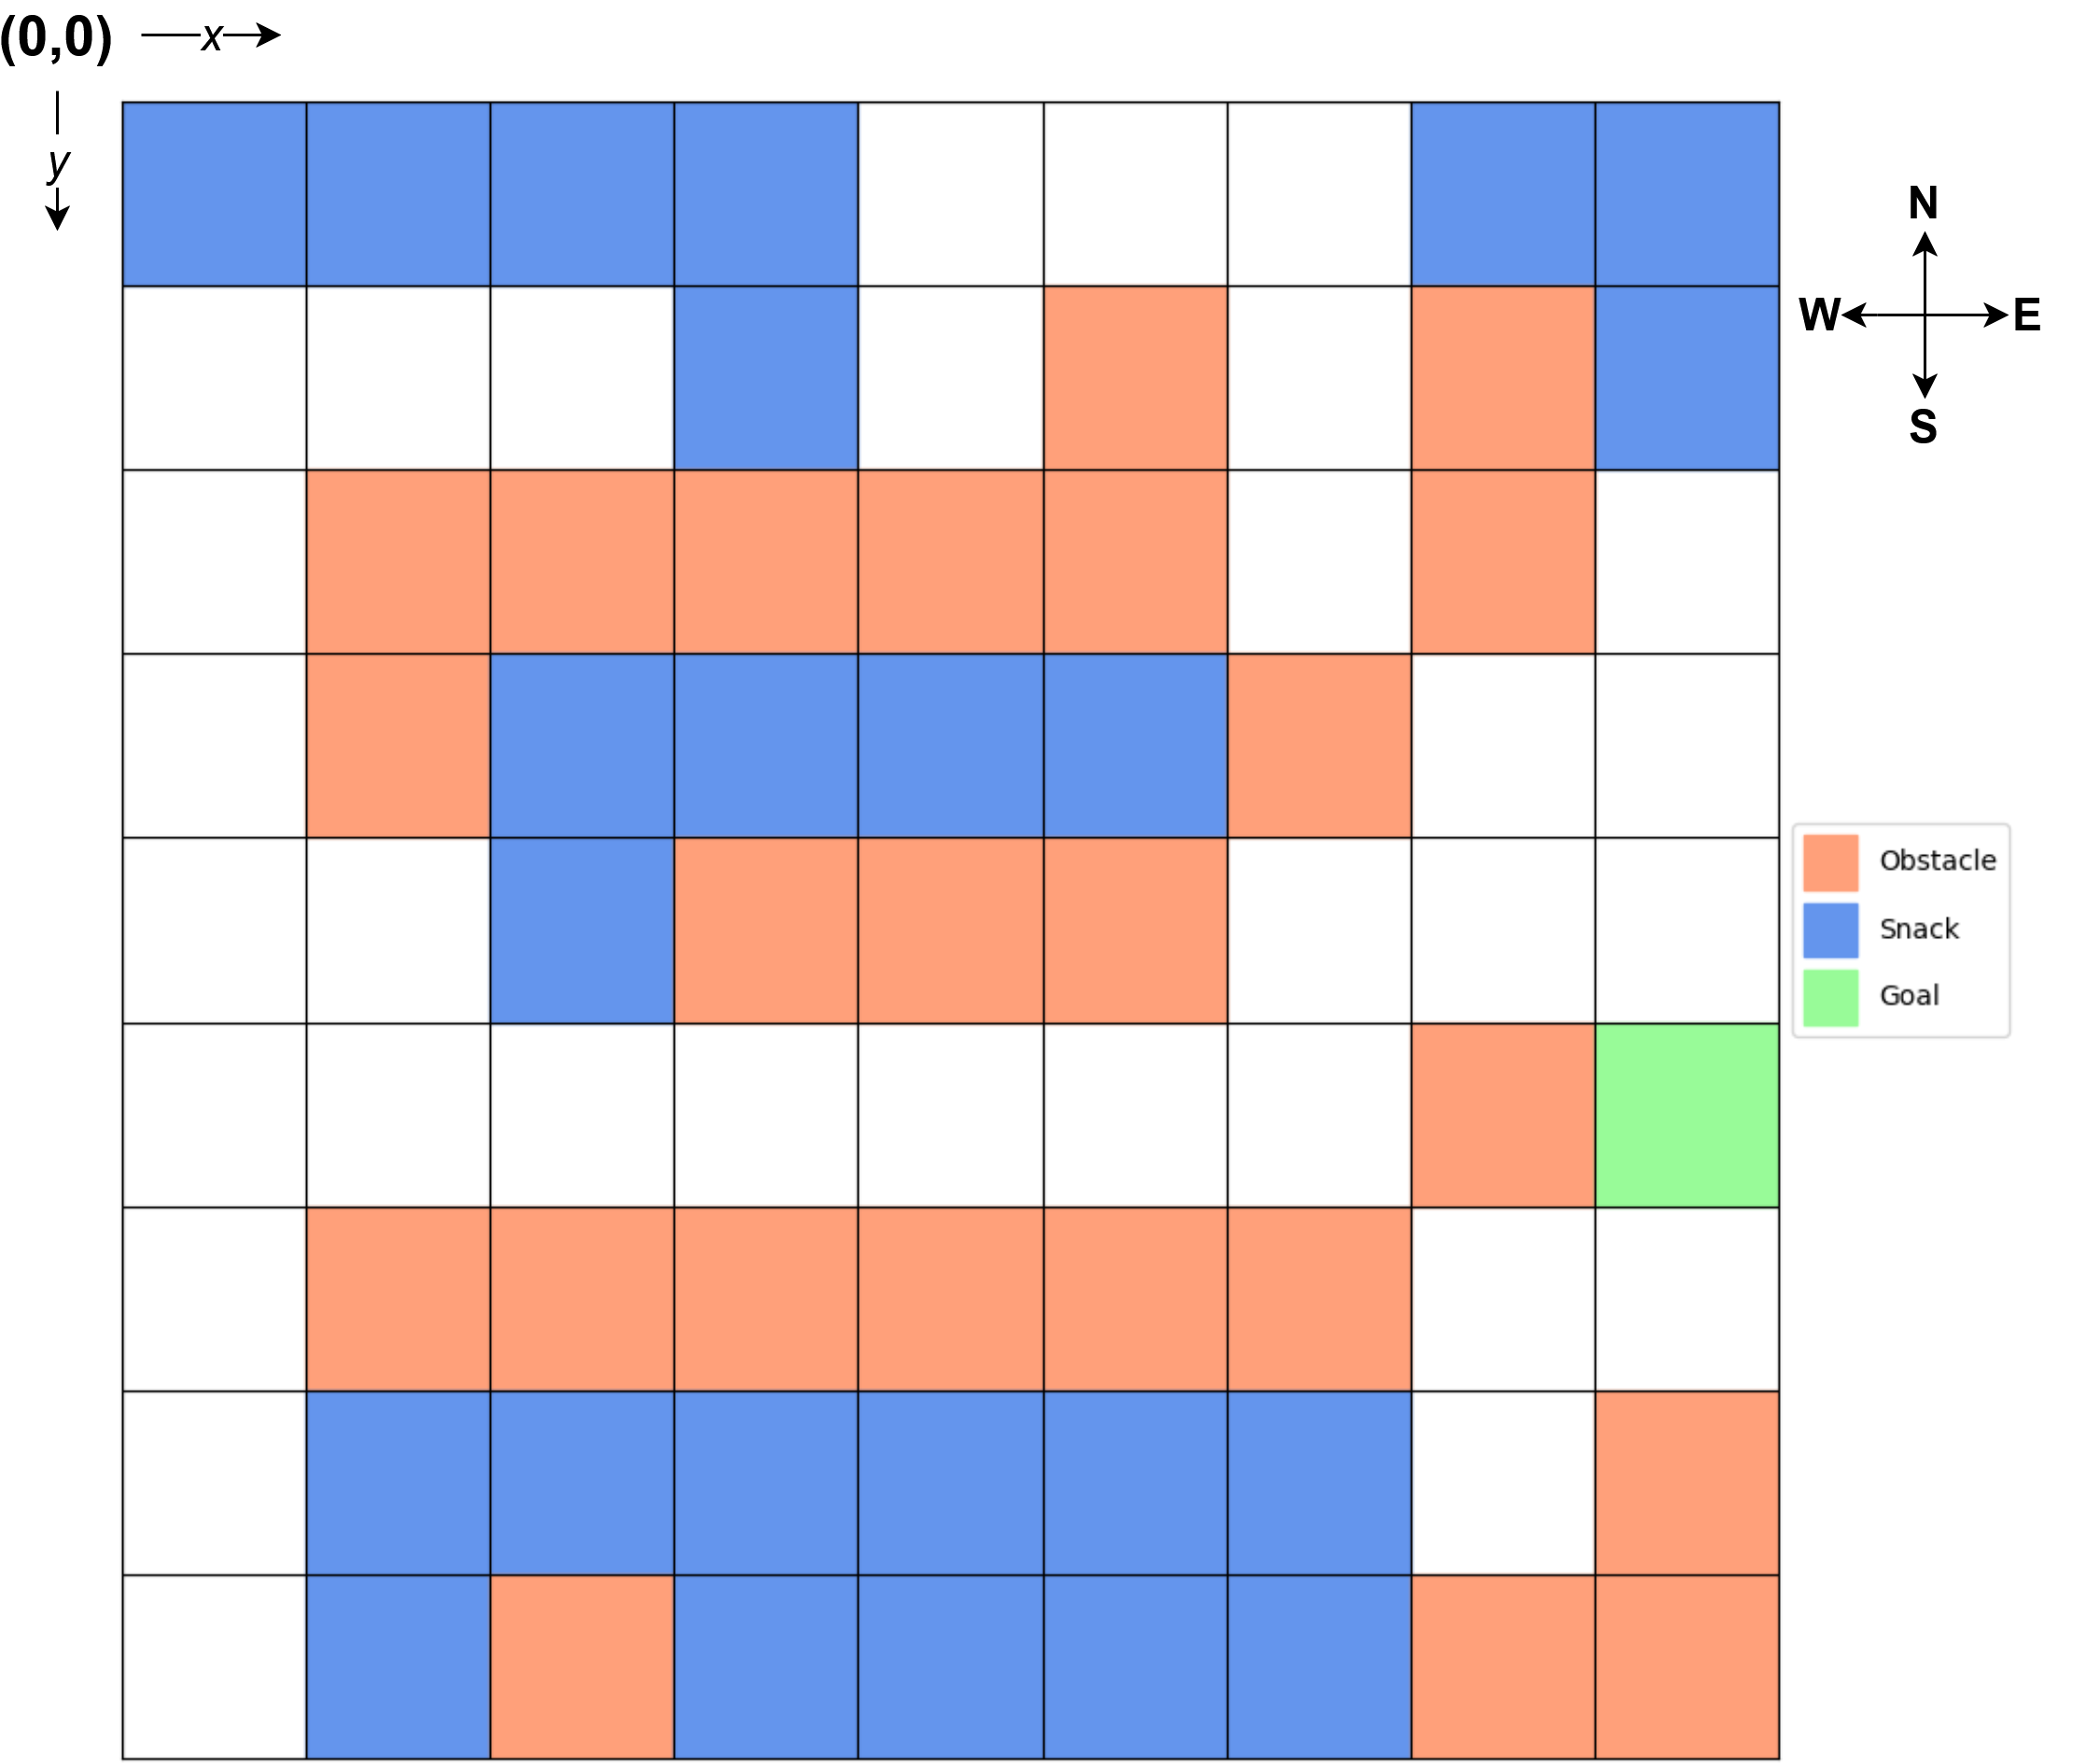

In [1]:
from IPython.display import Image, display
display(Image(filename='helpers/rl_grid_sketch_25.png', width=650))

The agent may start in any cell that is not an obstacle nor the goal.

It can choose between eight actions, which correspond to moving to the directions 

$$a_i \in \{NW,      N,      NE,     E,     SE,    S,     SW,     W\}$$

These are indexed according to the order above, i.e. $a_0 = NW$ and $a_6 = SW$.

The agent must be careful, for the actions are non-deterministic! The agent moves with probability $0.8$ into the desired
direction, but with probability $0.15$ deviates $45^{\circ}$ to the left and with probability $0.05$ deviates $45^{\circ}$ 
to the right of the desired direction due to treacherous gusts unexpectedly sweeping the grid.

The rewards are structured as follows:

* When it reaches a blue cell, it receives a little snack of 16 points.

* When it attempts to enter a red obstacle cell, it receives -32 points and stays in the cell it came from.

* When it attempts to leave the grid, it receives -32 points and stays in the cell it came from.

* When the agent reaches the green goal cell, it receives 180 points and the episode ends.

* All other actions entering a white cell receive -1 point.

## Task 2.1

To familiarize yourself with the environment above, answer the following questions:

* The agent is at $s = (y_s, x_s) = (3, 5)$ and wants to execute $a_5$. What is the probability $P^a_{s,s'}$ for $s' =(4,6)$?


* The agent is at $s = (4, 7)$ and wants to execute $a_3$. What is the expected value of the reward?

<div style="text-align: right; font-weight:bold"> 1 + 2 = 3 Points </div>

Please answer in this text cell.

## Task 2.2)

Using the *Iterative Policy Evaluation* Algorithm, compute the value $V^{\pi}(s)$ of all accessible cells $s$ for a policy $\pi(s,a)$ that chooses with probability $0.5$ a random action and otherwise attempts to move to the right.

Intialize $V(s)$ with zero, use a discount parameter of $\gamma=0.9$ and show your results by printing your state values $V^{\pi}(s)$.

<div style="text-align: right; font-weight:bold"> 5 Points </div>

#### Note

For your convenience, you are provided the helper function *getNextStatesRewardsAndProbabilities(state, action)* which returns for a given state $s$ and an action $a$ a list of 3 -tuples of the form

$$[(s_0', R^a_{s,s_0'}, P^a_{s,s_0'}), (s_1', R^a_{s,s_1'}, P^a_{s,s_1'}), \dots]$$

where $s_i'$ are all future states with $P^a_{s,s_i'} \neq 0$. Here $s = (y, x)$ and $s_i' = (y_i', x_i')$ are both tuples of integers, $a \in {0, \dots, 7}$ is an integer, and $R^a_{s,s_i'}$, $P^a_{s,s_i'}$ are both floats.

Also, please find below some data structures which you might find helpful. Create code and text cells as necessary to present your solution!

In your implementation, $V(s)$ should be a $9 \times 9$ numpy array and $\pi(s,a)$ should be a $9 \times 9 \times 8$ numpy array, where $\sum_a \pi(s,a) = 1$ for all s!

In [2]:
import numpy as np
from helpers.utils import getNextStatesRewardsAndProbabilities
%matplotlib inline

#this is a list of all states
states = [(y,x) for y in range(9) for x in range(9)]
#this is a list of all states containing obstacles
obstacles = [(1,5), (1,7), \
             (2,1), (2,2), (2,3), (2,4), (2,5), (2,7),\
             (3,1), (3,6), \
             (4,3), (4,4), (4,5), \
             (5,7), \
             (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), \
             (7,8), \
             (8,2), (8,7), (8,8)]
#this is a list containing all blue cells
snacks = [(0,0), (0,1), (0,2), (0,3), (0,7), (0,8), \
          (1,3), (1,8), \
          (3,2), (3,3), (3,4), (3,5), \
          (4,2), \
          (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), \
          (8,1), (8,3), (8,4), (8,5), (8,6)]
#this is a list containing all goal states
terminalStates = [(5,8)]
#this is an array containing all actions
actions = np.array([0, 1, 2, 3, 4, 5, 6, 7]) #[NW,      N,      NE,     E,     SE,    S,     SW,     W]
#example of how to unpack getNextStatesRewardsAndProbabilities(state, action):
#create dummy state and action
s_test = (0,6)
a_test = 3
#call helper function and loop over the return values
for sPrime, R, P in getNextStatesRewardsAndProbabilities(state=s_test, action=a_test):
    print('sPrime:', sPrime, 'R:', R, 'P:', P)
    
#once you have state values V, you can print them with okay'ish formatting like so:
#print("State Values:")
#print(np.around(V, 1))

sPrime: (0, 6) R: -32.0 P: 0.15
sPrime: (0, 7) R: 16.0 P: 0.8
sPrime: (0, 6) R: -32.0 P: 0.05


In [3]:
# Your code goes here

## Task 2.3)

Now it is time to find a good policy. Use the *Policy Iteration* algorithm to compute the optimal value $V^*(s)$ for each accessible cell.

Retrieve the resulting optimal-policy $\pi^*(s)$. To obtain a greedy policy given $V(s)$, make use of:

$$\pi_{greedy}(s) := \operatorname{argmax}_a Q(s,a) = \operatorname{argmax}_a \sum_{s'}P_{ss'}^a\cdot[R_{ss'}^a+\gamma\cdot V(s')]$$

As implied by these terms, we recommend using intermediate state-action $Q$-values, shaped $9 \times 9 \times 8$ for this step!

Finally, present your results by printing $V^*(s)$ and using our helper function *drawPolicy()* to visualize $\pi^*(s,a)$.

<div style="text-align: right; font-weight:bold"> 5 Points </div>

In [4]:
from helpers.utils import drawPolicy, drawGrid
#show policy using helper function as below
#usage of the helper function, where pi is a (9,9,8) numpy array representing a deterministic policy:
#drawPolicy(pi)
#deterministic here means that one action per state has probability 1 and all others have probability 0
#this will plot arrows representing your policies into the grid world.

In [5]:
# Your code goes here

## Task 2.4)

Verify your results from the previous task by using the *Value Iteration* algorithm to compute the optimal value $V^*(s)$ for each cell. Make sure to reinitialize $V(s)$ with zero.

Finally, present your results by printing $V^*(s)$ and using our helper function *drawPolicy()* to visualize $\pi^*(s,a)$.

<div style="text-align: right; font-weight:bold"> 4 Points </div>

In [6]:
# Your code goes here

## Task 2.5)

Modify your implementation of *Value Iteration* or *Policy Iteration* to ignore the random deviations in the environment. This can be achieved by calling *getNextStatesRewardsAndProbabilities(state, action, deviation=False)*.

Present your results by printing $V^*(s)$ and using our helper function *drawPolicy()* to visualize $\pi^*(s,a)$. How and why have your state values and policy changed?

<div style="text-align: right; font-weight:bold"> 3 Points </div>

In [7]:
# Your code goes here

Please answer in this text cell.